In [1]:
import numpy as np
import opt_einsum as oe

class gauss_legendre_quadrature():
    def __init__(self, Ktheta:int, Kphi:int, dim:int, Dcut:int, beta:float, mu1=0.0, mu2=0.0, mu3=0.0):
        self.Kt = Ktheta
        self.Kp = Kphi
        self.Dcut = Dcut
        self.dim  = dim
        self.beta = beta
        self.mu1  = mu1
        self.mu2  = mu2
        self.mu3  = mu3

    def SU3_matrix(self):
        Kt1 = self.Kt
        Kt2 = self.Kt
        Kt3 = self.Kt
        Kf1 = self.Kp
        Kf2 = self.Kp
        Kf3 = self.Kp
        Kf4 = self.Kp
        Kf5 = self.Kp

        from scipy.special import roots_legendre
        #t1, wt1 = roots_legendre(Kt1)
        #t2, wt2 = roots_legendre(Kt2)
        #t3, wt3 = roots_legendre(Kt3)
        #f1, wf1 = roots_legendre(Kf1)
        #f2, wf2 = roots_legendre(Kf2)
        #f3, wf3 = roots_legendre(Kf3)
        #f4, wf4 = roots_legendre(Kf4)
        #f5, wf5 = roots_legendre(Kf5)

        t1 = np.linspace(start=-1,stop=1,num=Kt1, endpoint=False) #+ 1/Kt1
        t2 = np.linspace(start=-1,stop=1,num=Kt2, endpoint=False) #+ 1/Kt2
        t3 = np.linspace(start=-1,stop=1,num=Kt3, endpoint=False) #+ 1/Kt3
        f1 = np.linspace(start=-1,stop=1,num=Kf1, endpoint=False) #+ 1/Kf1
        f2 = np.linspace(start=-1,stop=1,num=Kf2, endpoint=False) #+ 1/Kf2
        f3 = np.linspace(start=-1,stop=1,num=Kf3, endpoint=False) #+ 1/Kf3
        f4 = np.linspace(start=-1,stop=1,num=Kf4, endpoint=False) #+ 1/Kf4
        f5 = np.linspace(start=-1,stop=1,num=Kf5, endpoint=False) #+ 1/Kf5
        wt1 = 2 * np.ones(Kt1) / Kt1
        wt2 = 2 * np.ones(Kt2) / Kt2
        wt3 = 2 * np.ones(Kt3) / Kt3
        wf1 = 2 * np.ones(Kf1) / Kf1
        wf2 = 2 * np.ones(Kf2) / Kf2
        wf3 = 2 * np.ones(Kf3) / Kf3
        wf4 = 2 * np.ones(Kf4) / Kf4
        wf5 = 2 * np.ones(Kf5) / Kf5


        ct1  = np.cos(np.pi * (t1+1) / 4) #cos(θ1)
        ct2  = np.cos(np.pi * (t2+1) / 4) #cos(θ2)
        ct3  = np.cos(np.pi * (t3+1) / 4) #cos(θ3)
        st1  = np.sin(np.pi * (t1+1) / 4) #sin(θ1)
        st2  = np.sin(np.pi * (t2+1) / 4) #sin(θ2)
        st3  = np.sin(np.pi * (t3+1) / 4) #sin(θ3)
        epif1 = np.exp( 1j * np.pi * (f1+1)) #exp( iπφ_1)
        epif2 = np.exp( 1j * np.pi * (f2+1)) #exp( iπφ_2)
        epif3 = np.exp( 1j * np.pi * (f3+1)) #exp( iπφ_3)
        epif4 = np.exp( 1j * np.pi * (f4+1)) #exp( iπφ_4)
        epif5 = np.exp( 1j * np.pi * (f5+1)) #exp( iπφ_5)
        emif1 = np.exp(-1j * np.pi * (f1+1)) #exp(-iπφ_1)
        emif2 = np.exp(-1j * np.pi * (f2+1)) #exp(-iπφ_2)
        emif3 = np.exp(-1j * np.pi * (f3+1)) #exp(-iπφ_3)
        emif4 = np.exp(-1j * np.pi * (f4+1)) #exp(-iπφ_4)
        emif5 = np.exp(-1j * np.pi * (f5+1)) #exp(-iπφ_5)

        #epif1 = np.exp( 2j * np.pi * f1) #exp( iπφ_1)
        #epif2 = np.exp( 2j * np.pi * f2) #exp( iπφ_2)
        #epif3 = np.exp( 2j * np.pi * f3) #exp( iπφ_3)
        #epif4 = np.exp( 2j * np.pi * f4) #exp( iπφ_4)
        #epif5 = np.exp( 2j * np.pi * f5) #exp( iπφ_5)
        #emif1 = np.exp(-2j * np.pi * f1) #exp(-iπφ_1)
        #emif2 = np.exp(-2j * np.pi * f2) #exp(-iπφ_2)
        #emif3 = np.exp(-2j * np.pi * f3) #exp(-iπφ_3)
        #emif4 = np.exp(-2j * np.pi * f4) #exp(-iπφ_4)
        #emif5 = np.exp(-2j * np.pi * f5) #exp(-iπφ_5)
        #wf1 = np.ones(Kf1) / Kf1
        #wf2 = np.ones(Kf2) / Kf2
        #wf3 = np.ones(Kf3) / Kf3
        #wf4 = np.ones(Kf4) / Kf4
        #wf5 = np.ones(Kf5) / Kf5

        It1 = np.ones(shape=Kt1, dtype=complex)
        It2 = np.ones(shape=Kt2, dtype=complex)
        It3 = np.ones(shape=Kt3, dtype=complex)
        If1 = np.ones(shape=Kf1, dtype=complex)
        If2 = np.ones(shape=Kf2, dtype=complex)
        If3 = np.ones(shape=Kf3, dtype=complex)
        If4 = np.ones(shape=Kf4, dtype=complex)
        If5 = np.ones(shape=Kf5, dtype=complex)

        #Uij = Uij(θ1, θ2, θ3, φ1, φ2, φ3, φ4, φ5)
        U = np.zeros(shape=(3, 3, Kt1, Kt2, Kt3, Kf1, Kf2, Kf3, Kf4, Kf5), dtype=complex)
        path = "a,b,c,d,e,f,g,h->abcdefgh"
        U[0,0] =   oe.contract(path, ct1, ct2, It3, epif1, If2,   If3,   If4,   If5)
        U[0,1] =   oe.contract(path, st1, It2, It3, If1,   If2,   epif3, If4,   If5)
        U[0,2] =   oe.contract(path, ct1, st2, It3, If1,   If2,   If3,   epif4, If5)

        U[1,0] =   oe.contract(path, It1, st2, st3, If1,   If2,   If3,   emif4, emif5)\
                 - oe.contract(path, st1, ct2, ct3, epif1, epif2, emif3, If4,   If5)
        U[1,1] =   oe.contract(path, ct1, It2, ct3, If1,   epif2, If3,   If4,   If5)
        U[1,2] = - oe.contract(path, It1, ct2, st3, emif1, If2,   If3,   If4,   emif5)\
                 - oe.contract(path, st1, st2, ct3, If1,   epif2, emif3, epif4, If5)

        U[2,0] = - oe.contract(path, st1, ct2, st3, epif1, If2,   emif3, If4,   epif5)\
                 - oe.contract(path, It1, st2, ct3, If1,   emif2, If3,   emif4, If5)
        U[2,1] =   oe.contract(path, ct1, It2, st3, If1,   If2,   If3,   If4,   epif5)
        U[2,2] =   oe.contract(path, It1, ct2, ct3, emif1, emif2, If3,   If4,   If5)\
                 - oe.contract(path, st1, st2, st3, If1,   If2,   emif3, epif4, epif5)
        
        I = np.zeros_like(U)
        I[0,0] = oe.contract(path, It1, It2, It3, If1, If2, If3, If4, If5)
        I[1,1] = oe.contract(path, It1, It2, It3, If1, If2, If3, If4, If5)
        I[2,2] = oe.contract(path, It1, It2, It3, If1, If2, If3, If4, If5)

        #UI = oe.contract("ijabcdefgh,jkabcdefgh->ikabcdefgh", U, I)
        #err = np.linalg.norm(UI-U)/np.linalg.norm(U)
        #print(err)

        #from itertools import product 
        #iter = product(range(Kt1), range(Kt2), range(Kt3), 
        #               range(Kf1), range(Kf2), range(Kf3), range(Kf4), range(Kf5))
        #for i in iter:
        #    a,b,c,d,e,f,g,h = i
        #    Imat = I[:,:,a,b,c,d,e,f,g,h]
        #    Umat = U[:,:,a,b,c,d,e,f,g,h]
        #    UI = Umat @ np.conj(Imat.T)
        #    print(np.trace(Umat))
        #    #detU = np.linalg.det(Umat)
        #    #detUI = np.linalg.det(UI)
        #    #TrI  = np.trace(Imat)
        #    #TrU  = np.trace(Umat)
        #    #print(np.linalg.norm(Umat-UI))
        #    err = np.linalg.norm(Umat-UI)
        #    if err > 1e-13:
        #        print(i)
        
        #Jacobian = 1/(2π^5) sin(θ1)cos^3(θ1) sin(θ2)cos(θ2) sin(θ3)cos(θ3)
        Jt1 = st1 * (ct1**3)
        Jt2 = st2 * ct2
        Jt3 = st3 * ct3
        Jf1 = If1
        Jf2 = If2
        Jf3 = If3
        Jf4 = If4
        Jf5 = If5
        J = oe.contract(path, Jt1, Jt2, Jt3, Jf1, Jf2, Jf3, Jf4, Jf5) * (np.pi**3 / 128)
        #J = oe.contract(path, Jt1, Jt2, Jt3, Jf1, Jf2, Jf3, Jf4, Jf5) * (np.pi**3 / 4)

        #weight
        w = oe.contract(path, wt1, wt2, wt3, wf1, wf2, wf3, wf4, wf5)

        return U, w, J
    
    def cal_Boltzmann_weight(self, U, direction="spatial"):
        """
        direction: spatial or temporal 
        return: Boltzmann weight matrix M
        """

        if direction == "spatial":
            U = np.reshape(U, newshape=(3, 3, int((self.Kt**3) * (self.Kp**5))))
            M = oe.contract("ija,ijb->ab", U, np.conj(U))
            M = np.exp(self.beta * 3 * 2 * M.real)
        elif direction == "temporal":
            U = np.reshape(U, newshape=(3, 3, int((self.Kt**3) * (self.Kp**5))))
            M = oe.contract("ija,ijb->ab", U, np.conj(U))
            M = np.exp(self.beta * 3 * 2 * M.real)


        return M 

In [8]:
Kt=3
Kp=3
b=0.05
SU3pcm = gauss_legendre_quadrature(Kt, Kp, 2, 64, b)
U, _, _ = SU3pcm.SU3_matrix()
U = np.reshape(U, newshape=(3, 3, int((Kt**3) * (Kp**5))))
bw = oe.contract("ija,ijb->ab", U, np.conj(U)).real
#M = np.exp(b * 3 * 2 * M.real)
#bw = SU3pcm.cal_Boltzmann_weight(U)
bw = np.exp(b * 3 * 2 * bw.real)
bw = bw.flatten()

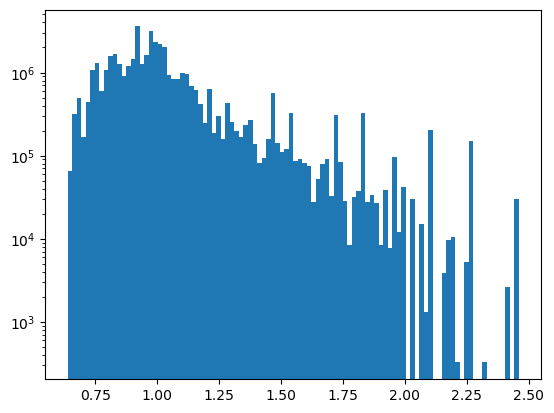

In [10]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot()
ax.hist(bw, bins=100)
ax.set_yscale('log')
#ax.set_xlim(0,36)
fig.show()

In [2]:
K = 6
b = 0.5
SU3_pcm = gauss_legendre_quadrature(K, b)

U, w, J = SU3_pcm.SU3_matrix()

i = oe.contract("ijabcdefgh,ijabcdefgh->abcdefgh", U, np.conj(U))
i = i.reshape((int(K**8)))
i

array([3.+0.j, 3.+0.j, 3.+0.j, ..., 3.+0.j, 3.+0.j, 3.+0.j])

In [3]:
from itertools import product 
iter = product(range(K), range(K), range(K), range(K), range(K), range(K), range(K), range(K))
for i in iter:
    a,b,c,d,e,f,g,h = i
    u = U[:,:,a,b,c,d,e,f,g,h]
    I = u @ np.conj(u.T)
    detI = np.linalg.det(I)
    if np.abs(detI-1) > 1e-13:
        print(i)


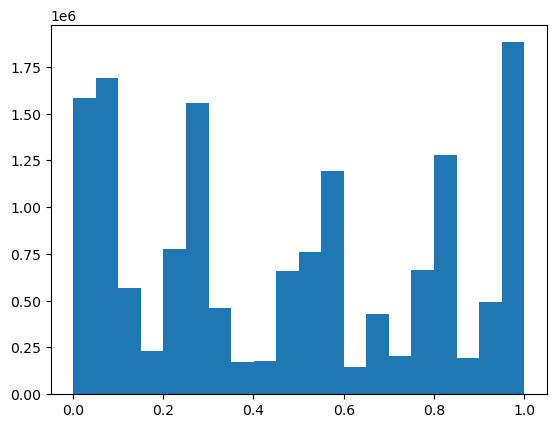

In [4]:
u = np.abs(U).flatten()

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(u, bins=20)
fig.show()

In [1]:
import numpy as np
import opt_einsum as oe

class gauss_legendre_quadrature():
    def __init__(self, Kt:int, Kp:int, beta:float, mu1=0.0, mu2=0.0):
        self.Kt = Kt
        self.Kp = Kp
        self.beta = beta
        self.mu1 = mu1
        self.mu2 = mu2

    def chemical_term(self):
        e11 = np.diag(np.asarray([np.exp( (self.mu1+self.mu2)/2), np.exp(-(self.mu1+self.mu2)/2)]))
        e12 = np.diag(np.asarray([np.exp( (self.mu1-self.mu2)/2), np.exp(-(self.mu1-self.mu2)/2)]))
        e21 = np.diag(np.asarray([np.exp(-(self.mu1-self.mu2)/2), np.exp( (self.mu1-self.mu2)/2)]))
        e22 = np.diag(np.asarray([np.exp(-(self.mu1+self.mu2)/2), np.exp( (self.mu1+self.mu2)/2)]))
        #e00 = np.diag([1.0,1.0])
        return e11,e12,e21,e22
    
    def gauss_legendre_quadrature(self):
        Kt = self.Kt
        Ka = self.Kp
        Kb = self.Kp

        from scipy.special import roots_legendre
        t, wt = roots_legendre(Kt)
        a, wa = roots_legendre(Ka)
        b, wb = roots_legendre(Kb)

        t = np.asarray(np.pi * (t + 1) / 4)
        a = np.asarray(np.pi * (a + 1))
        b = np.asarray(np.pi * (b + 1))

        return t, a, b, wt, wa, wb
    
    def partitioning_quadrature(self):
        Kt = self.Kt
        Ka = self.Kp
        Kb = self.Kp

        t = np.linspace(start=-1,stop=1,num=Kt, endpoint=False)
        a = np.linspace(start=-1,stop=1,num=Ka, endpoint=False)
        b = np.linspace(start=-1,stop=1,num=Kb, endpoint=False)
        wt = 2 * np.ones(Kt) / Kt
        wa = 2 * np.ones(Ka) / Ka
        wb = 2 * np.ones(Kb) / Kb

        t = np.asarray(np.pi * (t + 1) / 4)
        a = np.asarray(np.pi * (a + 1))
        b = np.asarray(np.pi * (b + 1))

        return t, a, b, wt, wa, wb

    def SU2_matrix(self, method="glq"):
        Kt = self.Kt
        Ka = self.Kp
        Kb = self.Kp

        if method == "glq":
            t, a, b, wt, wa, wb = self.gauss_legendre_quadrature()
        elif method == "pq":
            t, a, b, wt, wa, wb = self.partitioning_quadrature()

        epia = np.exp( 1j*a)
        epib = np.exp( 1j*b)
        emia = np.exp(-1j*a)
        emib = np.exp(-1j*b)
        st = np.sin(t)
        ct = np.cos(t)

        It = np.ones(shape=Kt, dtype=complex)
        Ia = np.ones(shape=Ka, dtype=complex)
        Ib = np.ones(shape=Kb, dtype=complex)

        #Uij = Uij(θ1, θ2, θ3, φ1, φ2, φ3, φ4, φ5)
        U = np.zeros(shape=(2, 2, Kt, Ka, Kb), dtype=complex)
        path = "t,a,b->tab"
        U[0,0] =  oe.contract("t,a,b->tab", ct, epia, Ib)
        U[0,1] =  oe.contract("t,a,b->tab", st, Ia, epib)
        U[1,0] = -oe.contract("t,a,b->tab", st, Ia, emib)
        U[1,1] =  oe.contract("t,a,b->tab", ct, emia, Ib)
        U = U.reshape((2, 2, Kt*Ka*Kb))
        

        #w[0] = contract("a,a,a->a", np.sin(theta), np.cos(theta), w[0])
        #Jacobian = (π/8) * sin(θ)cos(θ)
        Jt = st*ct
        Ja = Ia
        Jb = Ib
        J = oe.contract(path, Jt, Ja, Jb)

        #weight
        w = oe.contract(path, wt, wa, wb)

        return U, w, J
    
    def cal_Boltzmann_weight(self, direction="spatial", method="glq"):
        """
        direction: spatial or temporal 
        return: Boltzmann weight matrix M
        """

        U = self.SU2_matrix(method)

        e11,e12,e21,e22 = self.chemical_term()

        if direction == "spatial":
            U = np.reshape(U, newshape=(2, 2, int(self.Kt*self.Kp**2)))
            M = oe.contract("ija,ijb->ab", U, np.conj(U))
            M = np.exp(self.beta * 2 * 2 * M.real)
        elif direction == "temporal":
            U = np.reshape(U, newshape=(2, 2, int(self.Kt*self.Kp**2)))
            M = oe.contract("ija,ijb->ab", U, np.conj(U))
            M = np.exp(self.beta * 2 * 2 * M.real)

In [9]:
K = 26
b = 0.5
SU2_pcm = gauss_legendre_quadrature(K, K, b)

U, w, J = SU2_pcm.SU2_matrix("glq")
bw = b * 2 * 2 * oe.contract("ija,ijb->ab", U, np.conj(U)).real
bw = np.exp(bw.real)
bw = bw.flatten().real

#u,s,vh = SU2_pcm.

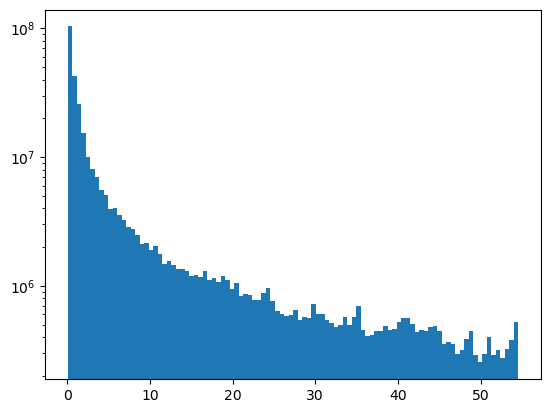

In [11]:

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(bw, bins=100)
ax.set_yscale("log")
#ax.set_xlim(0,10)
fig.show()

In [7]:
import dask.array as da
import opt_einsum as oe
import numpy as np

chi=64
chunk=8
A  = da.random.random((chi,chi,chi,chi))
UM = da.random.random((chi,chi,chi,chi))
VMH = da.random.random((chi,chi,chi,chi))
D = da.random.random((chi,chi,chi,chi))
sM = da.random.random(chi)

path = ['einsum_path', (0, 1), (0, 1), (0, 2), (0, 1)]
path1, info1 = oe.contract_path("aibc,akbf,cjde,e,flde->ijkl", A, A, UM, sM, UM) #XdagX
path2, info2 = oe.contract_path("abic,abkf,cdje,e,fdle->ijkl", A, A, UM, sM, UM) #YdagY
path3, info3 = oe.contract_path("bejf,delf,abic,a,adkc->ijkl", D, D, VMH, sM, VMH) #xxdag
path4, info4 = oe.contract_path("befj,defl,abci,a,adck->ijkl", D, D, VMH, sM, VMH) #yydag

print(path1)
print(path2)
print(path3)
print(path4)
info1

[(0, 1), (0, 1), (0, 2), (0, 1)]
[(0, 1), (0, 1), (0, 2), (0, 1)]
[(0, 1), (0, 1), (0, 2), (0, 1)]
[(0, 1), (0, 1), (0, 2), (0, 1)]


  Complete contraction:  aibc,akbf,cjde,e,flde->ijkl
         Naive scaling:  10
     Optimized scaling:  6
      Naive FLOP count:  5.765e+18
  Optimized FLOP count:  4.123e+11
   Theoretical speedup:  13980444.468
  Largest intermediate:  1.678e+7 elements
--------------------------------------------------------------------------------
scaling        BLAS                current                             remaining
--------------------------------------------------------------------------------
   6           TDOT        akbf,aibc->kfic                cjde,e,flde,kfic->ijkl
   4              0           e,cjde->ecjd                  flde,kfic,ecjd->ijkl
   6           TDOT        ecjd,flde->cjfl                       kfic,cjfl->ijkl
   6           TDOT        cjfl,kfic->ijkl                            ijkl->ijkl

In [12]:
import dask.array as da
import opt_einsum as oe
import numpy as np

chi=64
chunk=8
A  = da.random.random((chi,chi,chi,chi))
UM = da.random.random((chi,chi,chi,chi))
VMH = da.random.random((chi,chi,chi,chi))
D = da.random.random((chi,chi,chi,chi))
sM = da.random.random(chi)
PX = da.random.random((chi,chi,chi))
PY = da.random.random((chi,chi,chi))
Px = da.random.random((chi,chi,chi))
Py = da.random.random((chi,chi,chi))

path = ['einsum_path', (0, 1), (0, 1), (0, 1)]
path1, info1 = oe.contract_path("Tabi,acX,icdk,bdY->TXYk", A, PX, UM, PY) #G
path2, info2 = oe.contract_path("kjab,xac,jtcd,ybd->kxyt", VMH, Px, D, Py) #H


#print(path1)
#print(path2)
path1, info1


([(0, 1), (0, 1), (0, 1)],
   Complete contraction:  Tabi,acX,icdk,bdY->TXYk
          Naive scaling:  9
      Optimized scaling:  7
       Naive FLOP count:  7.206e+16
   Optimized FLOP count:  9.071e+12
    Theoretical speedup:  7943.758
   Largest intermediate:  1.074e+9 elements
 --------------------------------------------------------------------------------
 scaling        BLAS                current                             remaining
 --------------------------------------------------------------------------------
    6           TDOT        acX,Tabi->cXTbi                  icdk,bdY,cXTbi->TXYk
    6           TDOT        bdY,icdk->bYick                     cXTbi,bYick->TXYk
    7           TDOT      bYick,cXTbi->TXYk                            TXYk->TXYk)

In [12]:
def leg_slicing(leg_size, slicing):
    """
    leg_size, slicing: can be a exponential notation if the number is large
    slicing leg_size to slicing parts \\
    if leg_size < slicing, return a list of slice(i, i+1) \\
    if slicing==0, return one element list of slice(0, leg_size) \\
    return a list of slice class
    """
    leg_size = int(leg_size)
    slicing = int(slicing)

    if leg_size == 0:
        print(leg_size, slicing)
        import sys
        print("leg_size or slicing is zero!")
        sys.exit(0)

    if leg_size < slicing:
        slice_list = [slice(i, i+1) for i in range(leg_size)]
        return slice_list, len(slice_list)
    
    if slicing == 0:
        slice_list = [slice(0, leg_size)]
        return slice_list, len(slice_list)

    bs1 = leg_size // slicing + 1
    bs2 = leg_size // slicing

    #n1*bs1 + n2*bs2 = leg_size
    #n1 + n2 = slicing
    n1 = (leg_size - bs2*slicing) // (bs1 - bs2)
    n2 = slicing - n1
    
    slice_list = [slice(i, i+bs1) for i in range(0, n1*bs1, bs1)]
    slice_list += [slice(i, i+bs2) for i in range(n1*bs1, leg_size, bs2)]

    return slice_list, len(slice_list)



In [19]:
from math import ceil, floor

slicing = 1000
chi_i = 64
chi_X0 = 64
chi_Y1 = 64

slicing_i = slicing
slic_list_i , nslic_i  = leg_slicing(leg_size=chi_i , slicing=slicing_i)

slicing_X0 = ceil(slicing/nslic_i)
slic_list_X0, nslic_X0 = leg_slicing(leg_size=chi_X0, slicing=slicing_X0)

slicing_Y1 = ceil(slicing/nslic_i/nslic_X0)
slic_list_Y1, nslic_Y1 = leg_slicing(leg_size=chi_Y1, slicing=slicing_Y1)

nslic_i, nslic_X0, nslic_Y1

(64, 16, 1)

In [8]:
import dask.array as da
import opt_einsum as oe
import numpy as np

chi=48
N = int(4**3 * 6**5)
nchunk_N = 125
B = da.random.random((chi, N), chunks=(chi, N//nchunk_N))
A = da.random.random((N, chi), chunks=(N//nchunk_N, chi))
w = da.random.random(N, chunks=nchunk_N)
J = da.random.random(N, chunks=nchunk_N)

Y = da.random.standard_normal((chi,chi,chi))
#path = [(0, 1), (0, 5), (0, 1, 2, 3, 4)]
#path, info = np.einsum_path("a,a,aT,aX,ta,xa,txl->TXl", w, J, A, A, B, B, Y) #2d
#path, info = oe.contract_path("a,a,aT,aX,ta,xa,txl->TXl", w, J, A, A, B, B, Y)#, optimize="greedy") #2d
path, info = oe.contract_path("a,a,aT,aX,ta,xa,TXl->txl", w, J, A, A, B, B, Y) #2d

#path = [(0, 1), (0, 5), (0, 1, 2, 3, 4, 5, 6)]
#Y = da.random.standard_normal((chi,chi,chi,chi))
#path, info = oe.contract_path("a,a,aT,aX,aY,ta,xa,ya,txyl->TXYl", w, J, A, A, A, B, B, B, Y)#, optimize=path) #3d
#path, info = oe.contract_path("a,a,aT,aX,aY,ta,xa,ya,txyl->txyl", w, J, A, A, A, B, B, B, Y)#, optimize=path) #3d

#Y = da.random.standard_normal((chi,chi,chi,chi,chi))
#path1 = [(0,1), (0,9), (0,8), (0,1), (0,1), (0,1), (0,3,4), (0,1,2)]
#path2 = [(0,1), (0,9), (0,8), (0,1), (0,1), (0,1), (0,4), (2,3), (0,2), (0,1)]
#path, info = oe.contract_path("a,a,aT,aX,aY,aZ,ta,xa,ya,za,txyzl->TXYZl", w, J, A, A, A, A, B, B, B, B, Y, optimize=path1) #4d
path, info

([(0, 1), (0, 5), (0, 1), (0, 2), (1, 2), (0, 1)],
   Complete contraction:  a,a,aT,aX,ta,xa,TXl->txl
          Naive scaling:  6
      Optimized scaling:  5
       Naive FLOP count:  8.876e+14
   Optimized FLOP count:  5.286e+12
    Theoretical speedup:  167.910
   Largest intermediate:  1.147e+9 elements
 --------------------------------------------------------------------------------
 scaling        BLAS                current                             remaining
 --------------------------------------------------------------------------------
    1              0                 a,a->a                aT,aX,ta,xa,TXl,a->txl
    2              0               a,aT->aT                  aX,ta,xa,TXl,aT->txl
    3              0             ta,aX->taX                    xa,TXl,aT,taX->txl
    3              0             aT,xa->aTx                      TXl,taX,aTx->txl
    5           TDOT          aTx,taX->TxtX                         TXl,TxtX->txl
    5           TDOT          TxtX,T

In [25]:
import dask.array as da
import opt_einsum as oe
import numpy as np

chi=48
N = int(4**3 * 6**5)
nchunk_N = 125
B = da.random.random((chi, N), chunks=(chi, N//nchunk_N))
A = da.random.random((N, chi), chunks=(N//nchunk_N, chi))
w = da.random.random(N, chunks=nchunk_N)
J = da.random.random(N, chunks=nchunk_N)

#Q = da.random.standard_normal((chi,chi,chi))
#path1, info = oe.contract_path("a,a,aT,aX,ta,xa,TXl->txl", da.conj(w), da.conj(J), 
#                                                          da.conj(A), da.conj(A), 
#                                                          da.conj(B), da.conj(B), Q)#2d
#path2, info = oe.contract_path("a,a,aT,aX,ta,xa,txl->TXl", w, J, A, A, B, B, Q) #2d

path = [(0, 1), (0, 5), (0, 1, 2, 3, 4, 5, 6)]
Q = da.random.standard_normal((chi,chi,chi,chi))
path1, info = oe.contract_path("a,a,ta,xa,ya,aT,aX,aY,TXYl->txyl", da.conj(w), da.conj(J), 
                                                           da.conj(B), da.conj(B),  da.conj(B), 
                                                           da.conj(A), da.conj(A),  da.conj(A), Q)#3d
path2, info = oe.contract_path("a,a,aT,aX,aY,ta,xa,ya,txyl->TXYl", w, J, 
                                                           A, A, A, 
                                                           B, B, B, Q) #3d


#path11 = [(0,1), (0,9), (0,8), (0,1), (0,1), (0,1), (0,3,4), (0,1,2)]
#path22 = [(0,1), (0,9), (0,8), (0,1), (0,1), (0,1), (0,4), (2,3), (0,2), (0,1)]
#Q = da.random.standard_normal((chi,chi,chi,chi,chi))
#path1, info1 = oe.contract_path("a,a,ta,xa,ya,za,aT,aX,aY,aZ,TXYZl->txyzl", da.conj(w), da.conj(J), 
#                                                           da.conj(B), da.conj(B), da.conj(B), da.conj(B), 
#                                                           da.conj(A), da.conj(A), da.conj(A), da.conj(A), 
#                                                           Q, optimize=path11)#4d
#path2, info2 = oe.contract_path("a,a,aT,aX,aY,aZ,ta,xa,ya,za,txyzl->TXYZl", w, J, 
#                                                           A, A, A, A, 
#                                                           B, B, B, B, Q, optimize=path11) #4d
print(info1)
print(info2)

  Complete contraction:  a,a,ta,xa,ya,za,aT,aX,aY,aZ,TXYZl->txyzl
         Naive scaling:  10
     Optimized scaling:  6
      Naive FLOP count:  7.405e+21
  Optimized FLOP count:  7.608e+14
   Theoretical speedup:  9732037.022
  Largest intermediate:  1.147e+9 elements
--------------------------------------------------------------------------------
scaling        BLAS                current                             remaining
--------------------------------------------------------------------------------
   1              0                 a,a->a ta,xa,ya,za,aT,aX,aY,aZ,TXYZl,a->txyzl
   2              0               a,ta->at  xa,ya,za,aT,aX,aY,aZ,TXYZl,at->txyzl
   3              0             at,xa->atx    ya,za,aT,aX,aY,aZ,TXYZl,atx->txyzl
   3              0             za,ya->zay      aT,aX,aY,aZ,TXYZl,atx,zay->txyzl
   3              0             aX,aT->aXT        aY,aZ,TXYZl,atx,zay,aXT->txyzl
   3              0             aZ,aY->aZY          TXYZl,atx,zay,aXT,aZY->txyzl

In [2]:
import dask.array as da
import opt_einsum as oe
import numpy as np

chi=48
N = int(4**3 * 6**5)
nchunk_N = 125
B = da.random.random((chi, N), chunks=(chi, N//nchunk_N))
A = da.random.random((N, chi), chunks=(N//nchunk_N, chi))
w = da.random.random(N, chunks=nchunk_N)
J = da.random.random(N, chunks=nchunk_N)

#Q = da.random.standard_normal((chi,chi,chi))
#path = [(0, 1), (0, 5), (0, 1, 2, 3, 4)]
#path, info = oe.contract_path("a,a,aT,aX,ta,xa,txl->TXl", w, J, A, A, B, B, Q)#, optimize="greedy") #2d
#path, info = oe.contract_path("a,a,ta,xa,aT,aX,TXl->ltx", w, J, B, B, A, A, da.conj(Q)) #2d

#path = [(0, 1), (0, 7), (0, 1), (0, 1), (0, 2), (0, 2), (1, 2), (0, 1)]
#Q = da.random.standard_normal((chi,chi,chi,chi))
#path1, info1 = oe.contract_path("a,a,ta,xa,ya,aT,aX,aY,TXYl->ltxy", w, J, B, B, B, A, A, A, da.conj(Q), optimize=path) #3d
#path2, info2 = oe.contract_path("a,a,ta,xa,ya,aT,aX,aY,TXYl->txyl", w, J, B, B, B, A, A, A, Q, optimize=path) #3d

Q = da.random.standard_normal((chi,chi,chi,chi,chi))
path1 = [(0,1), (0,9), (0,8), (0,1), (0,1), (0,1), (0,3,4), (0,1,2)]
path2 = [(0,1), (0,9), (0,8), (0,1), (0,1), (0,1), (0,4), (2,3), (0,2), (0,1)]
path1, info1 = oe.contract_path("a,a,ta,xa,ya,za,aT,aX,aY,aZ,TXYZl->ltxyz", w, J, B, B, B, B, A, A, A, A, Q, optimize=path1) #4d
path2, info2 = oe.contract_path("a,a,ta,xa,ya,za,aT,aX,aY,aZ,TXYZl->txyzl", w, J, B, B, B, B, A, A, A, A, Q, optimize=path1) #4d

print(info1)
print(info2)

  Complete contraction:  a,a,ta,xa,ya,za,aT,aX,aY,aZ,TXYZl->ltxyz
         Naive scaling:  10
     Optimized scaling:  6
      Naive FLOP count:  7.405e+21
  Optimized FLOP count:  7.608e+14
   Theoretical speedup:  9732037.022
  Largest intermediate:  1.147e+9 elements
--------------------------------------------------------------------------------
scaling        BLAS                current                             remaining
--------------------------------------------------------------------------------
   1              0                 a,a->a ta,xa,ya,za,aT,aX,aY,aZ,TXYZl,a->ltxyz
   2              0               a,ta->at  xa,ya,za,aT,aX,aY,aZ,TXYZl,at->ltxyz
   3              0             at,xa->atx    ya,za,aT,aX,aY,aZ,TXYZl,atx->ltxyz
   3              0             za,ya->zay      aT,aX,aY,aZ,TXYZl,atx,zay->ltxyz
   3              0             aX,aT->aXT        aY,aZ,TXYZl,atx,zay,aXT->ltxyz
   3              0             aZ,aY->aZY          TXYZl,atx,zay,aXT,aZY->ltxyz

In [66]:
from scipy import optimize
import numpy as np

def tanh_sinh_transform(N):
    def tanhsinh(t):
        return np.tanh((np.pi/2)*np.sinh(t))
    
    def residue(t, x):
        return tanhsinh(t) - x

    def tanhsinhprime(t, x):
        return (np.pi/2) * np.cosh(t) / (np.cosh(np.pi/2 * np.sinh(t))**2)

    x = np.linspace(start=-1, stop=1, num=N, endpoint=False) + 1/N
    t = np.ones_like(x)
    for i,xi in enumerate(x):
        t[i] = optimize.fsolve(residue, x0=0.0, args=xi, 
                               fprime=tanhsinhprime)[0]
        
    return t, tanhsinhprime(t, 0), tanhsinh(t)


def f(x):
    return 1 / (1 + x**2)

def integral(func, x, w, h):
    f = func(x)
    IN = np.sum(f * w )* h
    return IN

N = 100
t, wt, x = tanh_sinh_transform(N)
dx = 2/(N)
w = np.ones_like(wt)

integral(f, x, w, dx) * 2

3.1416259869230054

In [52]:
from scipy import optimize
import numpy as np

def tanh_sinh_transform(a, h):
    def tanhsinh(t):
        return np.tanh((np.pi/2)*np.sinh(t))
    
    def residue(t, x):
        return tanhsinh(t) - x

    def tanhsinhprime(t, x):
        return (np.pi/2) * np.cosh(t) / (np.cosh(np.pi/2 * np.sinh(t))**2)

    t = np.arange(start=-a, stop=a+h, step=h)
    x = tanhsinh(t)
            
    w = tanhsinhprime(t, 0)
    return x, w


def f(x):
    return 1 / (1 + x**2)

def integral(func, x, w, h):
    f = func(x)
    print(w)
    IN = np.sum(f * w )* h
    return IN

h = 0.5
a = 2
x, w = tanh_sinh_transform(a, h)

err = integral(f, x, w, h) * 2 - np.pi
err /= np.pi
print(f"{abs(err):.12e}", f"N={len(w)}")
x

[2.66200514e-04 1.83431670e-02 2.30022395e-01 9.65976579e-01
 1.57079633e+00 9.65976579e-01 2.30022395e-01 1.83431670e-02
 2.66200514e-04]
5.560496131290e-03 N=9


array([-0.99997748, -0.99751486, -0.95136796, -0.67427149,  0.        ,
        0.67427149,  0.95136796,  0.99751486,  0.99997748])

In [47]:
from scipy.special import roots_legendre

N_glq = 11
x, w = roots_legendre(N_glq)
err = integral(f, x, w, h=1) * 2 - np.pi
err /= np.pi
print(f"{abs(err):.12e}")
x

[0.05566857 0.12558037 0.18629021 0.23319376 0.26280454 0.27292509
 0.26280454 0.23319376 0.18629021 0.12558037 0.05566857]
6.188116590716e-09


array([-0.97822866, -0.8870626 , -0.73015201, -0.51909613, -0.26954316,
        0.        ,  0.26954316,  0.51909613,  0.73015201,  0.8870626 ,
        0.97822866])

In [46]:
N=11
x = np.linspace(-1,1,N,False)+1/N
w = np.ones_like(x)
err = integral(f, x, w, 2/N) * 2 - np.pi
err /= np.pi
print(f"{abs(err):.12e}")
x

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
8.768646474432e-04


array([-9.09090909e-01, -7.27272727e-01, -5.45454545e-01, -3.63636364e-01,
       -1.81818182e-01,  8.32667268e-17,  1.81818182e-01,  3.63636364e-01,
        5.45454545e-01,  7.27272727e-01,  9.09090909e-01])

In [11]:
import numpy as np

h0_0 = "1.424419e+05 2.510891e+04 2.510891e+04 1.900032e+04 1.900032e+04 \
 1.900032e+04 1.900032e+04 1.900032e+04 1.900032e+04 1.900032e+04 \
 1.900032e+04 1.233388e+04 1.233388e+04 1.233388e+04 1.233388e+04 \
 1.233388e+04 1.233388e+04 1.233388e+04 1.233388e+04 6.879297e+03 \
 5.306095e+03 4.300982e+03 4.300982e+03 4.300982e+03 4.300982e+03 \
 4.300982e+03 4.300982e+03 4.300982e+03 4.300982e+03 4.225375e+03 \
 4.225375e+03 4.225375e+03 4.225375e+03 4.171819e+03 3.649712e+03 \
 3.649712e+03 3.649712e+03 3.649712e+03 2.872421e+03 2.872421e+03 \
 2.770663e+03 2.770663e+03 2.770663e+03 2.770663e+03 2.444493e+03 \
 2.444493e+03 2.372181e+03 2.372181e+03 2.372181e+03 2.372181e+03 \
 2.209148e+03 2.209148e+03 2.209148e+03 2.209148e+03 2.209148e+03 \
 2.209148e+03 2.209148e+03 2.209148e+03 1.965927e+03 1.965927e+03 \
 1.965927e+03 1.965927e+03 1.965927e+03 1.965927e+03".split()

h1em1 = "1.424423e+05 2.510904e+04 2.510904e+04 1.900043e+04 1.900038e+04 \
 1.900037e+04 1.900037e+04 1.900037e+04 1.900037e+04 1.900029e+04 \
 1.900029e+04 1.234425e+04 1.234421e+04 1.233390e+04 1.233390e+04 \
 1.233390e+04 1.233390e+04 1.232366e+04 1.232360e+04 6.879338e+03 \
 5.306096e+03 4.301667e+03 4.301030e+03 4.301030e+03 4.300988e+03 \
 4.300988e+03 4.300988e+03 4.300988e+03 4.300984e+03 4.225385e+03 \
 4.225385e+03 4.225380e+03 4.224690e+03 4.171824e+03 3.649716e+03 \
 3.649716e+03 3.649677e+03 3.649677e+03 2.872447e+03 2.872432e+03 \
 2.770710e+03 2.770683e+03 2.770683e+03 2.770675e+03 2.444496e+03 \
 2.444496e+03 2.372188e+03 2.372188e+03 2.372188e+03 2.372188e+03 \
 2.209197e+03 2.209191e+03 2.209173e+03 2.209173e+03 2.209173e+03 \
 2.209173e+03 2.209146e+03 2.209146e+03 1.968094e+03 1.967253e+03 \
 1.965947e+03 1.965938e+03 1.965813e+03 1.965459e+03".split()

h1em5 = "1.424419e+05 2.510891e+04 2.510891e+04 1.900032e+04 1.900032e+04 \
 1.900032e+04 1.900032e+04 1.900032e+04 1.900032e+04 1.900032e+04 \
 1.900032e+04 1.233388e+04 1.233388e+04 1.233388e+04 1.233388e+04 \
 1.233388e+04 1.233388e+04 1.233388e+04 1.233388e+04 6.879297e+03 \
 5.306095e+03 4.300982e+03 4.300982e+03 4.300982e+03 4.300982e+03 \
 4.300982e+03 4.300982e+03 4.300982e+03 4.300982e+03 4.225375e+03 \
 4.225375e+03 4.225375e+03 4.225375e+03 4.171819e+03 3.649712e+03 \
 3.649712e+03 3.649712e+03 3.649712e+03 2.872421e+03 2.872421e+03 \
 2.770663e+03 2.770663e+03 2.770663e+03 2.770663e+03 2.444493e+03 \
 2.444493e+03 2.372181e+03 2.372181e+03 2.372181e+03 2.372181e+03 \
 2.209148e+03 2.209148e+03 2.209148e+03 2.209148e+03 2.209148e+03 \
 2.209148e+03 2.209148e+03 2.209148e+03 1.965928e+03 1.965927e+03 \
 1.965927e+03 1.965927e+03 1.965927e+03 1.965927e+03".split()

h0_0  = np.array(h0_0, dtype=float)
h1em1 = np.array(h1em1, dtype=float)
h1em5 = np.array(h1em5, dtype=float)

h0_0max = np.max(h0_0)
h1em1max = np.max(h1em1)
h1em5max = np.max(h1em5)

for a,b,c in zip(h0_0,h1em1,h1em5):
    print(f"{a/h0_0max:.6e} {b/h1em1max:.6e} {c/h1em5max:.6e}")

1.000000e+00 1.000000e+00 1.000000e+00
1.762747e-01 1.762752e-01 1.762747e-01
1.762747e-01 1.762752e-01 1.762747e-01
1.333900e-01 1.333904e-01 1.333900e-01
1.333900e-01 1.333900e-01 1.333900e-01
1.333900e-01 1.333899e-01 1.333900e-01
1.333900e-01 1.333899e-01 1.333900e-01
1.333900e-01 1.333899e-01 1.333900e-01
1.333900e-01 1.333899e-01 1.333900e-01
1.333900e-01 1.333894e-01 1.333900e-01
1.333900e-01 1.333894e-01 1.333900e-01
8.658885e-02 8.666141e-02 8.658885e-02
8.658885e-02 8.666113e-02 8.658885e-02
8.658885e-02 8.658875e-02 8.658885e-02
8.658885e-02 8.658875e-02 8.658885e-02
8.658885e-02 8.658875e-02 8.658885e-02
8.658885e-02 8.658875e-02 8.658885e-02
8.658885e-02 8.651686e-02 8.658885e-02
8.658885e-02 8.651644e-02 8.658885e-02
4.829546e-02 4.829561e-02 4.829546e-02
3.725094e-02 3.725084e-02 3.725094e-02
3.019464e-02 3.019936e-02 3.019464e-02
3.019464e-02 3.019489e-02 3.019464e-02
3.019464e-02 3.019489e-02 3.019464e-02
3.019464e-02 3.019460e-02 3.019464e-02
3.019464e-02 3.019460e-02

In [1]:
import numpy as np

b0_05 = "2.158084e+04 5.788862e+03 4.826571e+03 3.887981e+03 3.887980e+03 \
 1.403454e+03 9.159308e+02 8.810231e+02 8.171807e+02 8.171773e+02 \
 5.375282e+02 3.769783e+02 3.769737e+02 2.636913e+02 1.327102e+02 \
 1.322465e+02 1.215670e+02 1.214984e+02 1.053681e+02 1.020602e+02 \
 7.393482e+01 7.388159e+01 5.491066e+01 5.350345e+01 4.895142e+01 \
 4.875197e+01 3.787119e+01 3.772928e+01 3.422171e+01 3.411523e+01 \
 1.465497e+01 1.448743e+01 1.352024e+01 1.300892e+01 1.229311e+01 \
 8.364958e+00 7.195655e+00 6.966149e+00 6.313273e+00 6.157109e+00 \
 5.839362e+00 5.598431e+00 5.037789e+00 4.747891e+00 4.415425e+00 \
 3.823574e+00 3.638424e+00 3.297153e+00".split()

b0_10 = "2.211046e+04 8.230693e+03 7.089044e+03 2.921278e+03 2.693427e+03 \
 2.277707e+03 2.274258e+03 1.326800e+03 1.095766e+03 5.681654e+02 \
 5.651417e+02 3.834413e+02 3.831257e+02 3.167852e+02 3.164163e+02 \
 2.108737e+02 2.034710e+02 1.422634e+02 1.422099e+02 1.337674e+02 \
 1.059099e+02 1.056640e+02 7.225761e+01 7.125128e+01 4.934715e+01 \
 4.889662e+01 3.582064e+01 3.494523e+01 2.896701e+01 2.808961e+01 \
 2.737577e+01 2.669993e+01 2.637486e+01 1.891294e+01 1.839399e+01 \
 1.743157e+01 1.602549e+01 1.529639e+01 1.198106e+01 1.124737e+01 \
 1.024909e+01 8.380182e+00 7.700718e+00 5.565765e+00 4.533160e+00 \
 4.046774e+00 3.299819e+00 2.851432e+00".split()

b0_18 = "2.388537e+04 1.253751e+04 1.009504e+04 5.254111e+03 5.181964e+03 \
 2.415566e+03 2.079787e+03 1.919914e+03 1.763138e+03 1.718734e+03 \
 1.276695e+03 7.046291e+02 6.771313e+02 5.271832e+02 5.258950e+02 \
 3.796728e+02 3.788233e+02 2.153003e+02 2.130360e+02 1.700431e+02 \
 1.690983e+02 1.500805e+02 1.433706e+02 1.431441e+02 1.199476e+02 \
 1.190188e+02 1.071789e+02 1.040084e+02 5.886240e+01 4.399371e+01 \
 4.248083e+01 4.124420e+01 3.681857e+01 3.455354e+01 3.196291e+01 \
 3.068439e+01 2.908417e+01 2.789467e+01 2.347160e+01 2.305865e+01 \
 2.103965e+01 1.960615e+01 1.654218e+01 1.391363e+01 9.466149e+00 \
 7.097616e+00 6.454367e+00 5.839089e+00".split()

b1_20 = "2.474884e+04 1.406186e+04 1.094146e+04 6.345858e+03 6.287864e+03 \
 2.961507e+03 2.585644e+03 2.531412e+03 1.776890e+03 1.594161e+03 \
 1.253684e+03 9.461740e+02 9.055807e+02 7.842991e+02 7.815710e+02 \
 3.879746e+02 3.873145e+02 2.652111e+02 2.595701e+02 2.270501e+02 \
 2.253996e+02 2.168864e+02 1.982655e+02 1.974778e+02 1.188496e+02 \
 1.178384e+02 1.163806e+02 1.156550e+02 6.285200e+01 6.097816e+01 \
 5.379196e+01 5.295567e+01 4.909983e+01 4.630369e+01 4.444698e+01 \
 4.376848e+01 4.148177e+01 3.925371e+01 3.222457e+01 2.883567e+01 \
 2.606822e+01 2.276586e+01 1.447933e+01 1.294217e+01 1.096576e+01 \
 9.558477e+00 8.649508e+00 8.306547e+00".split()

b1_40 = "2.748319e+04 1.802331e+04 1.264673e+04 9.199355e+03 9.183443e+03 \
 4.628367e+03 4.610384e+03 4.412063e+03 1.819421e+03 1.754463e+03 \
 1.725435e+03 1.626997e+03 1.543284e+03 1.310329e+03 1.157431e+03 \
 5.892092e+02 5.813131e+02 5.410768e+02 5.398499e+02 4.734033e+02 \
 3.930935e+02 3.915611e+02 2.757194e+02 2.750771e+02 1.683921e+02 \
 1.668036e+02 1.487645e+02 1.473149e+02 1.408034e+02 1.383183e+02 \
 1.239364e+02 1.229509e+02 7.775485e+01 7.619433e+01 7.446313e+01 \
 7.141069e+01 6.779155e+01 4.941395e+01 4.317784e+01 3.906492e+01 \
 3.538704e+01 3.063033e+01 2.980831e+01 2.829609e+01 2.701428e+01 \
 2.276927e+01 1.868486e+01 1.389711e+01".split()

b0_05 = np.array(b0_05, dtype=float)
b0_10 = np.array(b0_10, dtype=float)
b0_18 = np.array(b0_18, dtype=float)
b1_20 = np.array(b1_20, dtype=float)
b1_40 = np.array(b1_40, dtype=float)

b0_05max = np.max(b0_05)
b0_10max = np.max(b0_10)
b0_18max = np.max(b0_18)
b1_20max = np.max(b1_20)
b1_40max = np.max(b1_40)

for a,b,c,d,e in zip(b0_05, b0_10, b0_18, b1_20, b1_40):
    print(f"{a/b0_05max:.6e} {b/b0_10max:.6e} {c/b0_18max:.6e} {d/b1_20max:.6e} {e/b1_40max:.6e}")

1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
2.682408e-01 3.722534e-01 5.249033e-01 5.681826e-01 6.557940e-01
2.236507e-01 3.206195e-01 4.226453e-01 4.420999e-01 4.601624e-01
1.801589e-01 1.321220e-01 2.199719e-01 2.564103e-01 3.347266e-01
1.801589e-01 1.218169e-01 2.169514e-01 2.540670e-01 3.341476e-01
6.503241e-02 1.030149e-01 1.011316e-01 1.196625e-01 1.684072e-01
4.244185e-02 1.028589e-01 8.707368e-02 1.044754e-01 1.677529e-01
4.082432e-02 6.000780e-02 8.038033e-02 1.022841e-01 1.605368e-01
3.786603e-02 4.955872e-02 7.381665e-02 7.179690e-02 6.620123e-02
3.786587e-02 2.569668e-02 7.195760e-02 6.441356e-02 6.383768e-02
2.490766e-02 2.555993e-02 5.345092e-02 5.065627e-02 6.278147e-02
1.746819e-02 1.734208e-02 2.950045e-02 3.823104e-02 5.919971e-02
1.746798e-02 1.732780e-02 2.834921e-02 3.659083e-02 5.615374e-02
1.221877e-02 1.432739e-02 2.207139e-02 3.169034e-02 4.767747e-02
6.149446e-03 1.431071e-02 2.201745e-02 3.158011e-02 4.211414e-02
6.127959e-03 9.537282e-03

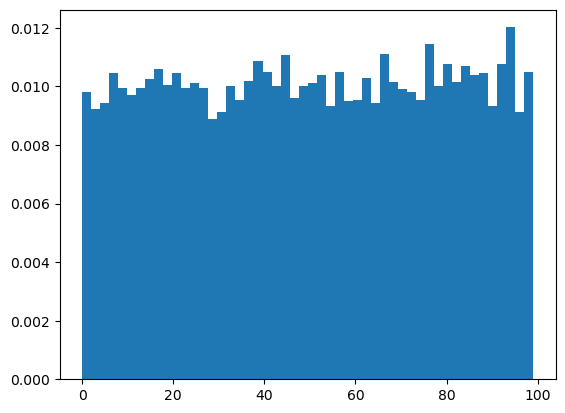

In [30]:
import numpy as np

a = []
for i in range(10000):
    a.append(np.random.choice(100, 1))
a = np.array(a)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(a, bins=50, density=True)
ifig.show()

In [2]:
import numpy as np
import opt_einsum as oe
from scipy.special import roots_legendre
p1, w1 = roots_legendre(100)
p2, w2 = p1, w1
p1 = np.pi * p1
p2 = np.pi * p2
I = np.ones_like(p1)

part1 = oe.contract("i,j->ij", p1, I) - oe.contract("i,j->ij", I, p2)
part1 = np.sin(part1/2)**2

part2 = oe.contract("i,j->ij", 2*p1, I) + oe.contract("i,j->ij", I, p2)
part2 = np.sin(part2/2)**2

part3 = oe.contract("i,j->ij", p1, I) + oe.contract("i,j->ij", I, 2*p2)
part3 = np.sin(part3/2)**2

J1 = oe.contract("ij,ij,ij->ij", part1, part2, part3)


In [3]:
J2 = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        J2[i,j] = (np.sin((p1[i]-p2[j])/2)**2) * (np.sin((2*p1[i]+p2[j])/2)**2) * (np.sin((p1[i]+2*p2[j])/2)**2)

J1-J2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
TrU = oe.contract("i,j->ij", np.exp(1j*p1), I) + oe.contract("i,j->ij", I, np.exp(1j*p2)) \
    + oe.contract("i,j->ij", np.exp(-1j*p1), np.exp(-1j*p2))

TrU2 = np.zeros((100,100), dtype=complex)
for i in range(100):
    for j in range(100):
        TrU2[i,j] = np.exp(1j*p1[i]) + np.exp(1j*p2[j]) + np.exp(-1j*(p1[i]+p2[j]))



In [63]:
import numpy as np
import itertools as iter

def sqr_distance(loc1:dict, loc2:dict):
    r1 = np.array(list(loc1.values()))
    r2 = np.array(list(loc2.values()))
    dist2 = np.sum((r1 - r2)*(r1 - r2))
    return dist2


nx = int(2**6) #- 1
ny = int(2**8) #- 1
nt = int(2**5) - 1
loc1 = {"T":nt, "X":nx, "Y":ny}

nx = int(2**6) #- 1
ny = int(2**8) #- 1
nt = int(2**5) #- 1
loc2 = {"T":nt, "X":nx, "Y":ny}

xloops = 10
yloops = 10
tloops = 10
TOT_RGSTEPS = {"T":tloops, "X":xloops, "Y":yloops}
rgstep = {"T":0, "X":0, "Y":0}

cycle = "TXY"
for direction in iter.cycle("TXY"):
    if sum(rgstep.values()) >= sum(TOT_RGSTEPS.values()):
        break
    if rgstep[direction] < TOT_RGSTEPS[direction]:
        loc1_before, loc2_before = loc1.copy(), loc2.copy()
        rgstep[direction] += 1
        loc1[direction] //= 2
        loc2[direction] //= 2
    print(f"impure tensor1: {loc1_before['X'], loc1_before['Y'], loc1_before['T']}->{loc1['X'], loc1['Y'], loc1['T']}")
    print(f"impure tensor2: {loc2_before['X'], loc2_before['Y'], loc2_before['T']}->{loc2['X'], loc2['Y'], loc2['T']}")
    print(f"square distance:", sqr_distance(loc1, loc2))

impure tensor1: (64, 256, 31)->(64, 256, 15)
impure tensor2: (64, 256, 32)->(64, 256, 16)
square distance: 1
impure tensor1: (64, 256, 15)->(32, 256, 15)
impure tensor2: (64, 256, 16)->(32, 256, 16)
square distance: 1
impure tensor1: (32, 256, 15)->(32, 128, 15)
impure tensor2: (32, 256, 16)->(32, 128, 16)
square distance: 1
impure tensor1: (32, 128, 15)->(32, 128, 7)
impure tensor2: (32, 128, 16)->(32, 128, 8)
square distance: 1
impure tensor1: (32, 128, 7)->(16, 128, 7)
impure tensor2: (32, 128, 8)->(16, 128, 8)
square distance: 1
impure tensor1: (16, 128, 7)->(16, 64, 7)
impure tensor2: (16, 128, 8)->(16, 64, 8)
square distance: 1
impure tensor1: (16, 64, 7)->(16, 64, 3)
impure tensor2: (16, 64, 8)->(16, 64, 4)
square distance: 1
impure tensor1: (16, 64, 3)->(8, 64, 3)
impure tensor2: (16, 64, 4)->(8, 64, 4)
square distance: 1
impure tensor1: (8, 64, 3)->(8, 32, 3)
impure tensor2: (8, 64, 4)->(8, 32, 4)
square distance: 1
impure tensor1: (8, 32, 3)->(8, 32, 1)
impure tensor2: (8, 32

In [83]:
import opt_einsum as oe
class ATRG_base(object):
    def __init__(self, U, s, VH, ndim:int):
        self.U = U
        self.s = s
        self.VH = VH
        self.ndim = ndim
        assert ndim+1 == U.ndim, "legs do not match system dimension"


class impure_tensor(ATRG_base):
    def __init__(self, U, s, VH, ndim:int, loc:dict):
        super(impure_tensor, self).__init__(U, s, VH, ndim)
        self.loc = loc
        self.Ttype = "impureTensor"
        self.is_impureTensor = True

    def cal_location(self, direction:str):
        self.loc[direction] //= 2

    def trace(self):
        TrT = oe.contract("txyi,ij,jtxy", self.U, self.s, self.VH)
        return TrT


class pure_tensor(ATRG_base):
    def __init__(self, U, s, VH, ndim:int):
        super(pure_tensor, self).__init__(U, s, VH, ndim)
        self.Ttype = "pureTensor"
        self.is_impureTensor = False
    
    def trace(self):
        TrT = oe.contract("txyi,i,itxy", self.U, self.s, self.VH)
        return TrT

import numpy as np
dim = 3
U = np.random.rand(3,3,3,3)
s = np.random.rand(3)
VH = np.random.rand(3,3,3,3)

imp = impure_tensor(U, s, VH, 3, loc={"X":1, "Y":2, "T":5})


__main__.impure_tensor